RFI testing of the DJI Matrice 600 Pro

In [1]:
# set your file set here!

fileset='./test_2/*.csv'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import h5py,glob
plt.rcParams.update({'font.size': 16})

In [3]:
def VNAtranslator(allscans, rows_to_cut=51):
    freqs = []
    mags = []
    for i in range(len(allscans)):
        data = []
        with open(allscans[i], 'rt') as f:
            reader = csv.reader(f)
            for row in reader:
                 #print(row)
                data.append(row)
        data_np = np.array(data)
        datafinal = data_np[rows_to_cut:-1]
        #print(datafinal)
        df=[]
        freq1 = []
        mag1 = []
        for i in datafinal:
            freq1.append(float(i[0]))
            mag1.append(float(i[1]))   
        freqs.append(freq1)
        mags.append(mag1)
    return(freqs,mags)

In [4]:
#empty

cage_freqs, cage_mags = VNAtranslator(["./test_1/cage-bicolog-008.csv"])
cage_freqs = cage_freqs[0]
cage_mags = cage_mags[0]


allscans=np.sort(glob.glob(fileset))
if("test_1" in fileset):
    allscans=allscans[:-1]
print(allscans)

freqs,mags=VNAtranslator(allscans = allscans, rows_to_cut=51)

allscans_empty = allscans
freqs_empty = freqs
mags_empty = mags  

if("test_1" in fileset):
    calibration = np.mean( np.array([mags[0], mags[-1] ]), axis=0 )
if("test_2" in fileset):
    calibration = mags[4]
    
    
#for i, arr in enumerate(mags_empty):
#    mags[i] = np.subtract(mags[i], calibration)
    



['./test_2/lfop-yagi-002.csv' './test_2/lfop-yagi-003.csv'
 './test_2/lfop-yagi-004.csv' './test_2/lfop-yagi-005.csv'
 './test_2/lfop-yagi-006.csv' './test_2/lfop-yagi-007.csv'
 './test_2/lfop-yagi-1.csv']


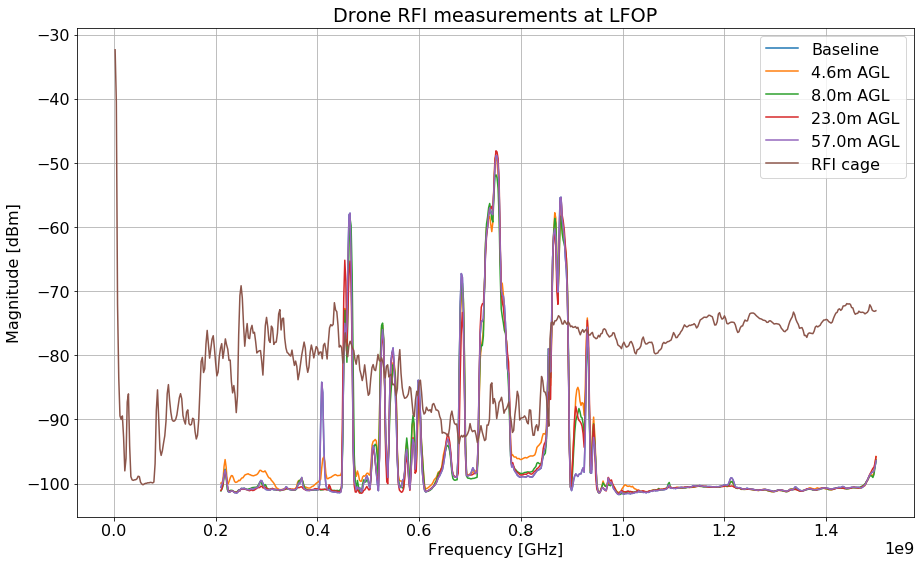

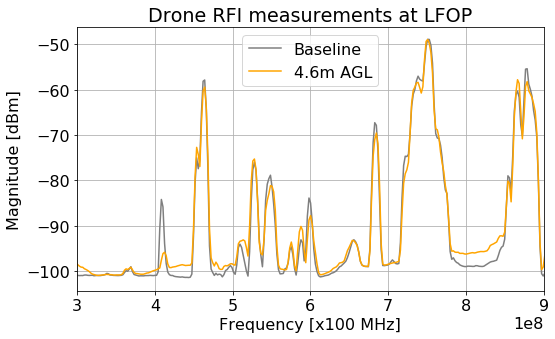

In [14]:
if("test_2" in fileset):
    plt.figure(figsize=(15,9))

    plt.plot(freqs[0], calibration, label="Baseline")
    plt.plot(freqs[0], mags[0], label="4.6m AGL")
    plt.plot(freqs[0], mags[2], label="8.0m AGL")
    plt.plot(freqs[0], mags[3], label="23.0m AGL")
    plt.plot(freqs[0], mags[4], label="57.0m AGL")
    plt.plot(cage_freqs, cage_mags, label="RFI cage")

    plt.xlabel("Frequency [GHz]")
    #plt.ylim(-105, -55)
    plt.ylabel("Magnitude [dBm]")
    plt.grid()
    plt.title("Drone RFI measurements at LFOP")
    plt.legend()
    plt.savefig("./test_2/rfi_lfop_yagi.png")
    plt.show()
    
    
    # cleaned up plot
    plt.rcParams.update({'font.size': 16})
    plt.figure(figsize=(8,5))

    plt.plot(freqs[0], calibration, label="Baseline", color="C7")
    plt.plot(freqs[0], mags[0], label="4.6m AGL", color="orange")
    #plt.plot(cage_freqs, cage_mags, label="RFI cage - worst case")
    #plt.plot(freqs[0], mags[2], label="8.0m AGL")
    #plt.plot(freqs[0], mags[3], label="23.0m AGL")
    #plt.plot(freqs[0], mags[4], label="57.0m AGL")

    plt.xlabel("Frequency [x100 MHz]")
    plt.xlim(300000000, 900000000)
    plt.ylabel("Magnitude [dBm]")
    plt.grid()
    plt.title("Drone RFI measurements at LFOP")
    plt.legend()
    plt.tight_layout()
    plt.savefig("./test_2/rfi_lfop_yagi_clean.png")
    plt.show()

In [6]:
if("test_1" in fileset):
    plt.figure(figsize=(15,9))
    #for i in [0,3]:
    #    plt.plot(freqs_foam[i],mags_foam[i],label=allscans_foam[i]) 

    # i = 2, 10 -> baseline
    # i = 3, 5  -> remote and/or ipad
    # i = 6 -> drone only
    # i = 8 -> connection between drone and ipad
    # then decrement by 2 because arr[0] = test 2

    plt.plot(freqs[0], calibration, label="Baseline")
    #plt.plot(freqs_empty[0], mags[8], label="baseline 2")
    plt.plot(freqs[0], mags[2], label="iPad only")
    plt.plot(freqs[0], mags[1], label="Remote only")
    plt.plot(freqs[0], mags[3], label="Remote and iPad")
    plt.plot(freqs[0], mags[4], label="Drone only")
    plt.plot(freqs[0], mags[6], label="Drone connected to remote")

    #for i in range(len(freqs_empty)):
    #    plt.plot(freqs_empty[i],mags[i],label=allscans_empty[i])
    plt.xlim(100000000, 1500000000)
    plt.xlabel("Frequency [GHz]")
    plt.ylim(-105, -55)
    plt.ylabel("Magnitude [dBm]")
    plt.grid()
    plt.title("Drone RFI measurements in RFI cage")
    plt.legend()
    plt.savefig("./test_1/rfi_bicolog.png")
    plt.show()
    
    
    # cleaned up plot
    plt.figure(figsize=(15,9))

    plt.plot(freqs[0], calibration, label="Baseline", color="C7")
    plt.plot(freqs[0], mags[6], label="Drone connected to remote")

    #for i in range(len(freqs_empty)):
    #    plt.plot(freqs_empty[i],mags[i],label=allscans_empty[i])
    plt.xlim(100000000, 1500000000)
    plt.xlabel("Frequency [GHz]")
    plt.ylim(-105, -55)
    plt.ylabel("Magnitude [dBm]")
    plt.grid()
    plt.title("Drone RFI measurements in RFI cage")
    plt.legend()
    plt.savefig("./test_1/rfi_bicolog_clean.png")
    plt.show()

Key:

002 - Blue - baseline  
003 - Orange- remote controller on  
004 - Green - iPad on  
005 - Red - both remote and iPad on  
006 - Darker purple - drone on  
007 - Brown - drone on, measured from directly underneath  
008 - Pink - drone, remote, and iPad all on and connected  
009 - Grey - same as above except measured from under the drone  
010 - Yellow - baseline part 2  

Notes:  
 * The iPad alone produces undetectable RFI
 * The remote produces significant RFI around the 100-400MHz range
 * The drone alone produces similar RFI
 * When the drone and the remote are properly paired, there is much more RFI above 800MHz